In [107]:
import pandas as pd
import numpy as np

## Data Preparation

In [307]:
df = pd.read_csv('data/all_data.csv')

In [308]:
df

,year,bracket,round,location,team_one_rank,team_one,team_one_score,team_two_rank,team_two,team_two_score,...,conference_losses_two,conference_win_loss_percentage_two,own_points_per_game_two,opp_points_per_game_two,strength_of_schedule_two,simple_rating_system_two,ap_pre_two,ap_high_two,ap_final_two,conference_tournament_champion_two
0,1985,East,First Round,"Hartford, CT",1,Georgetown,68,16,Lehigh,43,...,8.0,0.429,65.0,70.1,-12.02,-6.89,26.0,26.0,26.0,True
1,1985,East,Second Round,"Hartford, CT",1,Georgetown,63,8,Temple,46,...,3.0,0.833,64.8,57.8,7.67,0.67,26.0,26.0,26.0,True
2,1985,East,Sweet Sixteen,"Providence, RI",1,Georgetown,65,4,Loyola (IL),53,...,1.0,0.929,83.5,77.3,10.29,4.07,26.0,14.0,14.0,True
3,1985,East,Elite Eight,"Providence, RI",1,Georgetown,60,2,Georgia Tech,54,...,5.0,0.643,69.9,60.9,16.45,7.42,20.0,6.0,6.0,True
4,1985,East,Sweet Sixteen,"Providence, RI",3,Illinois,53,2,Georgia Tech,61,...,5.0,0.643,69.9,60.9,16.45,7.42,20.0,6.0,6.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,2023,West,First Round,14\nGrand Canyon\n70,3,Gonzaga,82,14,Grand Canyon,70,...,7.0,0.588,72.2,69.1,4.43,1.27,26.0,26.0,26.0,True
1860,2023,West,Sweet Sixteen,"Las Vegas, NV",3,Gonzaga,79,2,UCLA,76,...,2.0,0.900,74.1,60.7,22.11,8.66,8.0,2.0,7.0,False
1861,2023,West,Second Round,"Sacramento, CA",7,Northwestern,63,2,UCLA,68,...,2.0,0.900,74.1,60.7,22.11,8.66,8.0,2.0,7.0,False
1862,2023,West,First Round,"Sacramento, CA",7,Northwestern,75,10,Boise State,67,...,5.0,0.722,71.5,65.0,12.78,6.21,26.0,26.0,26.0,False


In [309]:
df[df['round'] == 'Final Four']

,year,bracket,round,location,team_one_rank,team_one,team_one_score,team_two_rank,team_two,team_two_score,...,conference_losses_two,conference_win_loss_percentage_two,own_points_per_game_two,opp_points_per_game_two,strength_of_schedule_two,simple_rating_system_two,ap_pre_two,ap_high_two,ap_final_two,conference_tournament_champion_two
18,1985,National,Final Four,"Lexington, KY",8,Villanova,52,2,Memphis,45,...,1.0,0.929,72.9,63.7,14.93,5.73,8.0,3.0,5.0,True
28,1985,National,Final Four,"Lexington, KY",1,St. John's (NY),59,1,Georgetown,77,...,2.0,0.875,74.0,58.9,20.89,5.77,1.0,1.0,1.0,True
60,1986,National,Final Four,"Dallas, TX",1,Kansas,67,1,Duke,71,...,2.0,0.857,79.8,67.2,22.10,9.50,6.0,1.0,1.0,True
98,1987,National,Final Four,"New Orleans, LA",6,Providence,63,2,Syracuse,77,...,4.0,0.750,82.1,72.4,17.98,8.23,15.0,5.0,10.0,False
140,1988,National,Final Four,"Kansas City, MO",6,Kansas,66,2,Duke,59,...,5.0,0.643,83.8,68.8,23.33,8.38,15.0,4.0,5.0,True
156,1988,National,Final Four,"Kansas City, MO",1,Arizona,78,1,Oklahoma,86,...,2.0,0.857,102.9,81.0,29.48,7.61,19.0,3.0,4.0,True
192,1989,National,Final Four,"Setle, WA",2,Duke,78,3,Seton Hall,95,...,5.0,0.688,81.1,69.3,20.91,9.16,26.0,9.0,11.0,False
219,1989,National,Final Four,"Setle, WA",3,Michigan,83,1,Illinois,81,...,4.0,0.778,86.4,74.1,24.68,12.42,9.0,1.0,3.0,False
232,1990,National,Final Four,"Denver, CO",4,Arkansas,83,3,Duke,97,...,5.0,0.643,89.1,76.6,21.34,8.81,10.0,3.0,15.0,False
318,1992,National,Final Four,"Minneapolis, MN",1,Duke,81,2,Indiana,78,...,4.0,0.778,83.4,65.8,30.05,12.43,2.0,2.0,5.0,False


In [310]:
pd.get_dummies(df).dtypes[pd.get_dummies(df).dtypes == 'bool']

team_one_wins                         bool
conference_tournament_champion_one    bool
conference_tournament_champion_two    bool
dtype: object

In [311]:
df['team_one_wins'] = (df['team_one_wins'] == True).astype(int)

In [312]:
df['conference_tournament_champion_one'] = (df['conference_tournament_champion_one'] == True).astype(int)

In [313]:
df['conference_tournament_champion_two'] = (df['conference_tournament_champion_two'] == True).astype(int)

In [314]:
data = pd.get_dummies(df)

In [315]:
additional_cols = ["team_one_Saint Mary's (CA)",
 'team_two_Grambling',
 "team_two_Saint Peter's",
 'team_one_Connecticut',
 'team_two_Wagner',
 'team_one_North Carolina',
 'team_two_Duquesne',
 'team_one_Brigham Young',
 'team_two_Stetson',
'team_one_McNeese State', 'team_one_Grand Canyon', 'team_two_Brigham Young', 'team_two_North Carolina']

In [316]:
for c in additional_cols:
    data[c] = 0

In [317]:
data

,year,team_one_rank,team_one_score,team_two_rank,team_two_score,team_one_wins,rank_one,overall_wins_one,overall_losses_one,overall_win_loss_percentage_one,...,team_one_Connecticut,team_two_Wagner,team_one_North Carolina,team_two_Duquesne,team_one_Brigham Young,team_two_Stetson,team_one_McNeese State,team_one_Grand Canyon,team_two_Brigham Young,team_two_North Carolina
0,1985,1,68,16,43,1,2.0,35.0,3.0,0.921,...,0,0,0,0,0,0,0,0,0,0
1,1985,1,63,8,46,1,2.0,35.0,3.0,0.921,...,0,0,0,0,0,0,0,0,0,0
2,1985,1,65,4,53,1,2.0,35.0,3.0,0.921,...,0,0,0,0,0,0,0,0,0,0
3,1985,1,60,2,54,1,2.0,35.0,3.0,0.921,...,0,0,0,0,0,0,0,0,0,0
4,1985,3,53,2,61,0,2.0,26.0,9.0,0.743,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,2023,3,82,14,70,1,1.0,31.0,6.0,0.838,...,0,0,0,0,0,0,0,0,0,0
1860,2023,3,79,2,76,1,1.0,31.0,6.0,0.838,...,0,0,0,0,0,0,0,0,0,0
1861,2023,7,63,2,68,0,3.0,22.0,12.0,0.647,...,0,0,0,0,0,0,0,0,0,0
1862,2023,7,75,10,67,1,3.0,22.0,12.0,0.647,...,0,0,0,0,0,0,0,0,0,0


## Train-Test Split

In [318]:
from sklearn.model_selection import train_test_split

In [319]:
data = data.drop(['year', 'team_one_score', 'team_two_score'], axis=1)

In [320]:
X = data.drop(['team_one_wins'], axis=1)
X

,team_one_rank,team_two_rank,rank_one,overall_wins_one,overall_losses_one,overall_win_loss_percentage_one,conference_wins_one,conference_losses_one,conference_win_loss_percentage_one,own_points_per_game_one,...,team_one_Connecticut,team_two_Wagner,team_one_North Carolina,team_two_Duquesne,team_one_Brigham Young,team_two_Stetson,team_one_McNeese State,team_one_Grand Canyon,team_two_Brigham Young,team_two_North Carolina
0,1,16,2.0,35.0,3.0,0.921,14.0,2.0,0.875,74.0,...,0,0,0,0,0,0,0,0,0,0
1,1,8,2.0,35.0,3.0,0.921,14.0,2.0,0.875,74.0,...,0,0,0,0,0,0,0,0,0,0
2,1,4,2.0,35.0,3.0,0.921,14.0,2.0,0.875,74.0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,2.0,35.0,3.0,0.921,14.0,2.0,0.875,74.0,...,0,0,0,0,0,0,0,0,0,0
4,3,2,2.0,26.0,9.0,0.743,12.0,6.0,0.667,68.2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,3,14,1.0,31.0,6.0,0.838,14.0,2.0,0.875,85.2,...,0,0,0,0,0,0,0,0,0,0
1860,3,2,1.0,31.0,6.0,0.838,14.0,2.0,0.875,85.2,...,0,0,0,0,0,0,0,0,0,0
1861,7,2,3.0,22.0,12.0,0.647,12.0,8.0,0.600,67.7,...,0,0,0,0,0,0,0,0,0,0
1862,7,10,3.0,22.0,12.0,0.647,12.0,8.0,0.600,67.7,...,0,0,0,0,0,0,0,0,0,0


In [321]:
og_data = X

In [322]:
%store og_data

Stored 'og_data' (DataFrame)


In [323]:
y = data['team_one_wins']
y

0       1
1       1
2       1
3       1
4       0
       ..
1859    1
1860    1
1861    0
1862    1
1863    1
Name: team_one_wins, Length: 1864, dtype: int64

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [325]:
X_train.shape, y_train.shape

((1677, 737), (1677,))

In [326]:
X_test.shape, y_test.shape

((187, 737), (187,))

## Model Exploration

In [327]:
from sklearn.ensemble import AdaBoostClassifier

In [328]:
model = AdaBoostClassifier(n_estimators=18)

In [329]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=18)

In [330]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [331]:
predictions = model.predict(X_test)

In [332]:
predictions

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [333]:
"""for i in range(len(predictions)):
    row_index = X_test.iloc[i].name
    one_wins = f"{df.iloc[row_index]['team_one']} wins"
    two_wins = f"{df.iloc[row_index]['team_two']} wins"
    print(f"{df.iloc[row_index]['team_one']} vs {df.iloc[row_index]['team_two']} - {one_wins if predictions[i] else two_wins}")
"""

'for i in range(len(predictions)):\n    row_index = X_test.iloc[i].name\n    one_wins = f"{df.iloc[row_index][\'team_one\']} wins"\n    two_wins = f"{df.iloc[row_index][\'team_two\']} wins"\n    print(f"{df.iloc[row_index][\'team_one\']} vs {df.iloc[row_index][\'team_two\']} - {one_wins if predictions[i] else two_wins}")\n'

In [334]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68        64
           1       0.83      0.86      0.84       123

    accuracy                           0.79       187
   macro avg       0.77      0.76      0.76       187
weighted avg       0.79      0.79      0.79       187



In [335]:
error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

In [336]:
import matplotlib.pyplot as plt

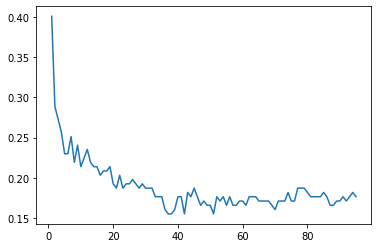

In [337]:
plt.plot(range(1,96),error_rates)

## Cross Validation

In [338]:
from sklearn.model_selection import GridSearchCV

In [339]:
param_grid = {
    'n_estimators': range(1,96)
}

In [340]:
model = AdaBoostClassifier()
g_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", cv=5, verbose=2)

In [341]:
g_search.fit(X_train, y_train)

Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=3; total time=   0.0s
[CV] END .....................................n

[CV] END ....................................n_estimators=21; total time=   0.2s
[CV] END ....................................n_estimators=21; total time=   0.2s
[CV] END ....................................n_estimators=21; total time=   0.2s
[CV] END ....................................n_estimators=21; total time=   0.2s
[CV] END ....................................n_estimators=22; total time=   0.2s
[CV] END ....................................n_estimators=22; total time=   0.2s
[CV] END ....................................n_estimators=22; total time=   0.2s
[CV] END ....................................n_estimators=22; total time=   0.2s
[CV] END ....................................n_estimators=22; total time=   0.2s
[CV] END ....................................n_estimators=23; total time=   0.2s
[CV] END ....................................n_estimators=23; total time=   0.2s
[CV] END ....................................n_estimators=23; total time=   0.2s
[CV] END ...................

[CV] END ....................................n_estimators=41; total time=   0.3s
[CV] END ....................................n_estimators=41; total time=   0.4s
[CV] END ....................................n_estimators=42; total time=   0.4s
[CV] END ....................................n_estimators=42; total time=   0.4s
[CV] END ....................................n_estimators=42; total time=   0.5s
[CV] END ....................................n_estimators=42; total time=   0.5s
[CV] END ....................................n_estimators=42; total time=   0.5s
[CV] END ....................................n_estimators=43; total time=   0.6s
[CV] END ....................................n_estimators=43; total time=   0.5s
[CV] END ....................................n_estimators=43; total time=   0.5s
[CV] END ....................................n_estimators=43; total time=   0.4s
[CV] END ....................................n_estimators=43; total time=   0.4s
[CV] END ...................

[CV] END ....................................n_estimators=62; total time=   0.6s
[CV] END ....................................n_estimators=62; total time=   0.5s
[CV] END ....................................n_estimators=62; total time=   0.6s
[CV] END ....................................n_estimators=62; total time=   0.6s
[CV] END ....................................n_estimators=62; total time=   0.6s
[CV] END ....................................n_estimators=63; total time=   0.6s
[CV] END ....................................n_estimators=63; total time=   0.6s
[CV] END ....................................n_estimators=63; total time=   0.6s
[CV] END ....................................n_estimators=63; total time=   0.6s
[CV] END ....................................n_estimators=63; total time=   0.6s
[CV] END ....................................n_estimators=64; total time=   0.6s
[CV] END ....................................n_estimators=64; total time=   0.6s
[CV] END ...................

[CV] END ....................................n_estimators=82; total time=   0.7s
[CV] END ....................................n_estimators=82; total time=   0.7s
[CV] END ....................................n_estimators=82; total time=   0.7s
[CV] END ....................................n_estimators=83; total time=   0.7s
[CV] END ....................................n_estimators=83; total time=   0.7s
[CV] END ....................................n_estimators=83; total time=   0.7s
[CV] END ....................................n_estimators=83; total time=   0.8s
[CV] END ....................................n_estimators=83; total time=   0.7s
[CV] END ....................................n_estimators=84; total time=   0.7s
[CV] END ....................................n_estimators=84; total time=   0.7s
[CV] END ....................................n_estimators=84; total time=   0.7s
[CV] END ....................................n_estimators=84; total time=   0.8s
[CV] END ...................

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': range(1, 96)},
             scoring='neg_mean_squared_error', verbose=2)

In [342]:
g_search.best_params_

{'n_estimators': 52}

## Model Performance

In [343]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [344]:
import math

In [345]:
y_predict = g_search.predict(X_test)

In [346]:
mae = mean_absolute_error(y_test, y_predict)
mae

0.17647058823529413

In [347]:
mse = mean_squared_error(y_test, y_predict)
mse

0.17647058823529413

In [348]:
rmse = math.sqrt(mse)
rmse

0.42008402520840293

In [349]:
print(accuracy_score(y_test,y_predict))

0.8235294117647058


## Model Performance on Whole Data Set

In [350]:
full_y_predict = g_search.predict(X)

In [351]:
print(accuracy_score(y,full_y_predict))

0.8615879828326181


## Model Export

In [352]:
import joblib

In [353]:
joblib.dump(g_search,'final_model.pkl')

['final_model.pkl']